In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv('homeprices.csv')
df.head(3)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000


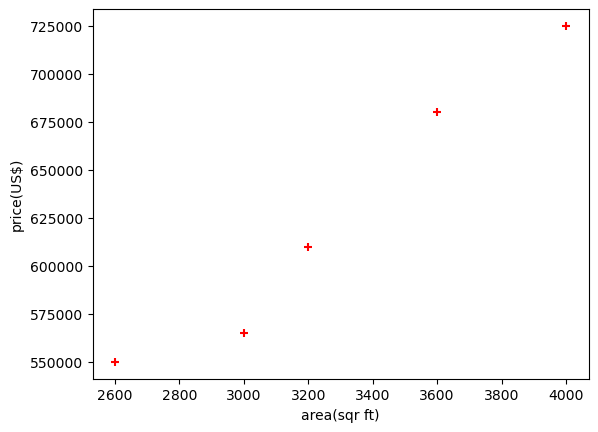

In [28]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,marker='+',color='red')

In [46]:
from sklearn import linear_model
reg=linear_model.LinearRegression() #create linear regression class object
reg.fit(df[['area']],df.price)

LinearRegression()

In [31]:
reg.predict([[3300]])

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

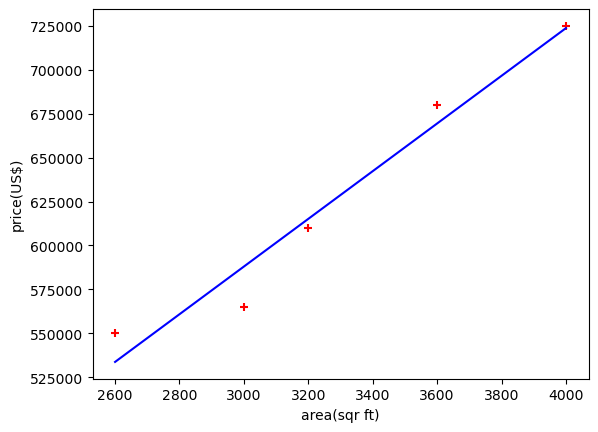

In [44]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,marker='+',color='red')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [33]:
d=pd.read_csv('areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [35]:
p=reg.predict(d)

In [45]:
d['price']=p # create column in d

In [39]:
d.head(3)

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [40]:
d.to_csv('prediction.csv',index=False)

#### Excercise

In [73]:
df_hire=pd.read_csv('hiring.csv')
df_hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [74]:
from word2number import w2n
df_hire['experience']=df_hire.experience.fillna('zero').astype(str)
df_hire['experience']=df_hire.experience.apply(w2n.word_to_num)
df_hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [75]:
df_hire['test_score(out of 10)'].median()

8.0

In [76]:
df_hire['test_score(out of 10)']= df_hire['test_score(out of 10)'].fillna(df_hire['test_score(out of 10)'].median())
df_hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [80]:
reg_hire=linear_model.LinearRegression()
reg_hire.fit(df_hire[['experience','test_score(out of 10)','interview_score(out of 10)']],df_hire['salary($)'])

LinearRegression()

In [83]:
reg_hire.predict([[2,9,6]])



C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [84]:
reg_hire.predict([[12,10,10]])

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

#### Gradient descent algorithm

In [85]:
df_testscores = pd.read_csv('test_scores.csv')
df_testscores

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


#### Handling categorical features-One Hot Encoding                                                                                                                                                                                                                                                                                

In [151]:
# Using getdummies
df=pd.read_csv('homepricesohe.csv')
df.head(3)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000


In [152]:
df_gd=pd.get_dummies(df.town,drop_first=True)

In [153]:
df_concat=pd.concat([df,df_gd],axis=1)

In [154]:
df_concat.head(3)

,town,area,price,robinsville,west windsor
0,monroe township,2600,550000,0,0
1,monroe township,3000,565000,0,0
2,monroe township,3200,610000,0,0


In [155]:
final= df_concat.drop('town',axis=1)
final.head(3)

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0


In [156]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [157]:
X=final.drop('price',axis=1)
X.head(3)

,area,robinsville,west windsor
0,2600,0,0
1,3000,0,0
2,3200,0,0


In [158]:
y=final.price
y.head(3)

0    550000
1    565000
2    610000
Name: price, dtype: int64

In [159]:
model.fit(X,y)

LinearRegression()

In [160]:
model.predict([[2800,1,0]])

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [161]:
model.predict([[3400,0,1]])

C:\Users\saras\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.6684584])

In [162]:
model.score(X,y)

0.9573929037221871

In [163]:
#Using sklearns one hot encoder
df.head(3)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000


In [164]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
df.town = le.fit_transform(df.town)

In [165]:
df.head(3)

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000


In [166]:
X=df[['town','area']].values

In [167]:
y=df['price']
y.head(3)

0    550000
1    565000
2    610000
Name: price, dtype: int64

In [168]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("town",OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [169]:
X=X[:,1:]

In [170]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [171]:
model.fit(X,y)

LinearRegression()

In [172]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [173]:
model.predict([[0,1,3400]])

array([681241.6684584])

#### Train test Split

In [176]:
df=pd.read_csv('carprices.csv')
df.head(3)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100


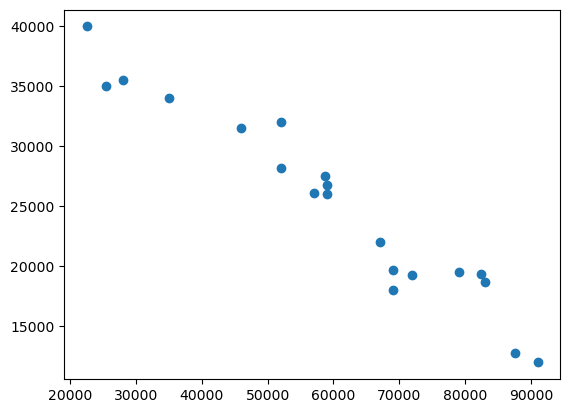

In [179]:
plt.scatter(df.Mileage,df['Sell Price($)'])

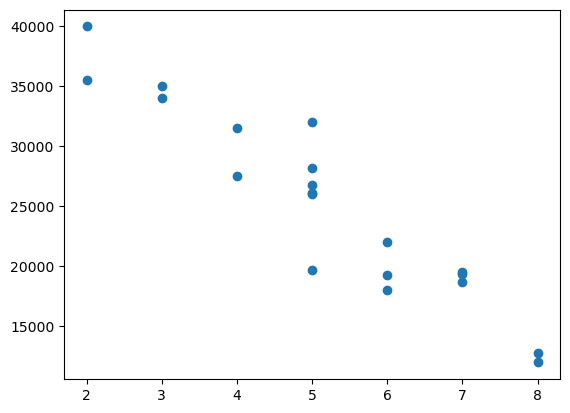

In [180]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [199]:
X=df[['Mileage','Age(yrs)']]
y=df['Sell Price($)']

In [200]:
X.head(3)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5


In [201]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [203]:
X_train

,Mileage,Age(yrs)
18,87600,8
4,46000,4
12,59000,5
5,59000,5
3,22500,2
6,52000,5
16,28000,2
1,35000,3
0,69000,6
14,82450,7


In [204]:
X_test

,Mileage,Age(yrs)
13,58780,4
10,83000,7
17,69000,5
2,57000,5


In [205]:
y_train

18    12800
4     31500
12    26000
5     26750
3     40000
6     32000
16    35500
1     34000
0     18000
14    19400
7     19300
8     12000
9     22000
11    19500
19    28200
15    35000
Name: Sell Price($), dtype: int64

In [206]:
y_test

13    27500
10    18700
17    19700
2     26100
Name: Sell Price($), dtype: int64

In [210]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [211]:
model.predict(X_test)

array([25982.51791146, 16548.60287411, 22123.90237242, 26115.07922913])

In [212]:
y_test

13    27500
10    18700
17    19700
2     26100
Name: Sell Price($), dtype: int64

In [213]:
model.score(X_test,y_test)

0.7838151320644622